VISHALL 22007347 & IDLAN 21001226
Digital Twin Assignment

This is to call the libraries that we downloaded earlier using anaconda ENVIROMENT 

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


Define the neural network 

In [11]:
class HeatNet(nn.Module):
    def __init__(self):
        super(HeatNet, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Define the Heat Source Function

In [12]:
def heat_source(x):
    return torch.sin(np.pi * x)


Data Preparation 

In [13]:
x = np.linspace(0, 1, 100)
t = np.linspace(0, 1, 100)
X, T = np.meshgrid(x, t)
x_train = torch.tensor(X.flatten(), dtype=torch.float32).unsqueeze(1)
t_train = torch.tensor(T.flatten(), dtype=torch.float32).unsqueeze(1)
inputs = torch.cat([x_train, t_train], dim=1)

u_initial = torch.zeros_like(x_train)  # Initial temperature distribution
H = heat_source(x_train)  # Heat source



Heat Equation Loss Function 

In [14]:
def heat_equation_loss(model, inputs, alpha):
    # Ensure inputs have requires_grad=True
    inputs.requires_grad_(True)
    
    u_pred = model(inputs)
    
    # Compute gradients
    u_x = torch.autograd.grad(outputs=u_pred, inputs=inputs, grad_outputs=torch.ones_like(u_pred), create_graph=True)[0][:, 0]
    u_xx = torch.autograd.grad(outputs=u_x, inputs=inputs, grad_outputs=torch.ones_like(u_x), create_graph=True)[0][:, 0]
    u_t = torch.autograd.grad(outputs=u_pred, inputs=inputs, grad_outputs=torch.ones_like(u_pred), create_graph=True)[0][:, 1]

    # Define the heat equation
    heat_eq = u_t - alpha * u_xx - heat_source(inputs[:, 0].unsqueeze(1))
    
    # Compute loss as mean squared error
    loss = torch.mean(heat_eq**2)
    
    return loss



Training Loop 

In [ ]:
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    u_pred = model(inputs)
    
    # Ensure u_pred has the same length as u_initial
    u_pred = u_pred[:u_initial.shape[0]]

    data_loss = criterion(u_pred, u_initial)  # Initial condition loss
    eq_loss = heat_equation_loss(model, inputs, alpha)  # Differential equation loss
    loss = data_loss + eq_loss

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [100/1000], Loss: 0.1363
Epoch [200/1000], Loss: 0.1516
Epoch [300/1000], Loss: 0.2754
Epoch [400/1000], Loss: 0.4209


Plot the results

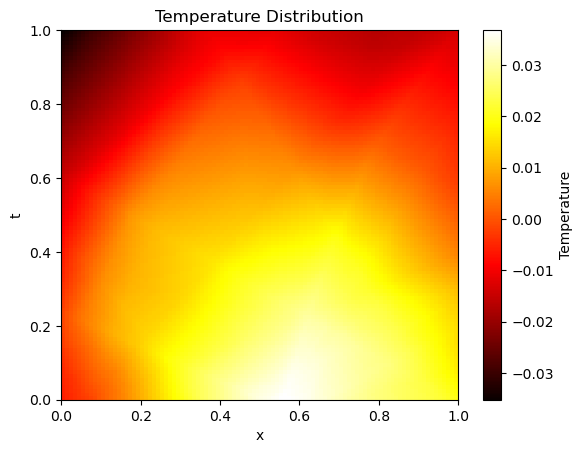

In [9]:
model.eval()
u_pred = model(inputs).detach().numpy().reshape((100, 100))
plt.imshow(u_pred, extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Temperature Distribution')
plt.show()
